In [1]:
import numpy as np
from intcode_computer import  intcode_computer

from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Check if position is traversable
def good_pos(graph, pos):
    x = pos[0]
    y = pos[1]
    if x < 0 or x >= len(graph):
        return False
    if y < 0 or y >= len(graph[x]):
        return False
    value = graph[x][y]
    return value != 0

#Breadth-First Search
def BFS(graph, start, end=None):
    dx = [-1, 1]
    dy = [-1, 1]
    queue = deque([start])
    dist = {start: 0}
    
    while len(queue):
        cur_pos = queue.popleft()
        cur_dist = dist[cur_pos]
        if cur_pos == end:
            return cur_dist
        for i in range(0, 2):
            nxt_dist = cur_dist + 1
            #move in x
            nxt_pos = (cur_pos[0]+dx[i], cur_pos[1])
            if good_pos(graph, nxt_pos) and nxt_pos not in dist.keys():
                queue.append(nxt_pos)
                dist[nxt_pos] = nxt_dist
            #move in y
            nxt_pos = (cur_pos[0], cur_pos[1]+dy[i])
            if good_pos(graph, nxt_pos) and nxt_pos not in dist.keys():
                queue.append(nxt_pos)
                dist[nxt_pos] = nxt_dist
                
    max_dist = 0
    for key in dist.keys():
        if dist[key] > max_dist:
            max_dist = dist[key]
    return max_dist

In [3]:
#Map hull

#input
#1 - North
#2 - South
#3 - East
#4 - West
#output
#0 - wall
#1 - empty
#2 - target

cpu = intcode_computer(15)

position = [0,0]
hull = [[[0,0], 1]]
last = 1
dirs = [1, 3, 2, 4]
move = 0
oxygen = []

#Wall hug left wall
#while True:
for i in range(0, 3170):
    if last == 0:
        move += 1
        if move == 4:
            move = 0
    else:
        move -= 1
        if move == -1:
            move = 3
    
    if move == 0:
        new_position = [position[0]+1,position[1]]
    elif move == 1:
        new_position = [position[0],position[1]+1]
    elif move == 2:
        new_position = [position[0]-1,position[1]]
    else:
        new_position = [position[0],position[1]-1]
    
    last = cpu.run_program(dirs[move], pause_on_out=True, verbose=False)[0]

    if [new_position, last] not in hull:
        hull.append([new_position, last])
    if last == 1 or last == 2:
        position = new_position

In [4]:
#Reset coordinate system
x_min = 0
x_max = 0
y_min = 0
y_max = 0
for i in range(0, len(hull)):
    if hull[i][0][0] < x_min:
        x_min = hull[i][0][0]
    if hull[i][0][0] > x_max:
        x_max = hull[i][0][0]
    if hull[i][0][1] < y_min:
        y_min = hull[i][0][1]
    if hull[i][0][1] > y_max:
        y_max = hull[i][0][1]

for i in range(0, len(hull)):
    hull[i][0][0] -= x_min
    hull[i][0][1] -= y_min
    if hull[i][1] == 2:
        end = hull[i][0]
        print('Oxygen at', end)

x_max -= x_min
y_max -= y_min
start = [-x_min,-y_min]
print('Start at',  start)

Oxygen at [35, 3]
Start at [19, 19]


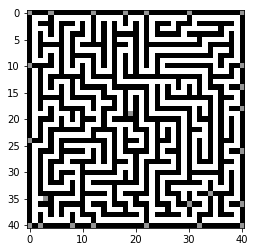

In [5]:
show_hull = np.ones((x_max+1, y_max+1),dtype=np.int)
show_hull *= 128
terrain = [255, 0, 128]
for i in range(0, len(hull)):
    show_hull[hull[i][0][0], hull[i][0][1]] = terrain[hull[i][1]]
show_hull[-x_min,-y_min] = 128

plt.imshow(show_hull, cmap='Greys')
plt.show()

In [6]:
#Convert hull for maze traversal
new_hull = np.ones((x_max+1, y_max+1),dtype=np.int)

for i in range(0, len(hull)):
    new_hull[hull[i][0][0], hull[i][0][1]] = hull[i][1]

#From start to end
print('Part 1 Solution:', BFS(new_hull, tuple(start), tuple(end)))
#From end to filled
print('Part 2 Solution:', BFS(new_hull, tuple(end)))

Part 1 Solution: 236
Part 2 Solution: 368
